In [1]:
%matplotlib inline
from kinetic import *
import matplotlib.pyplot as plt

In [2]:
## Plotting function from kinetic_assign.ipynb

def plot_state_frame(ax, state, color='blue'):
    # Extract positions
    r = []
    x = []
    y = []
    for m0, r0, x0, y0, vx0, vy0 in state:
        r.append(r0)
        x.append(x0)
        y.append(y0)
        
    
    # plt.scatter doesn't work for this -- scatter can't get size in data units, only "points"
    circles = []
    for nn in range(len(state)):
        circles.append(ax.add_artist(patches.Circle(xy=(x[nn], y[nn]), radius=r[nn], facecolor=color)))
        
    return circles

## 1. `find_overlaps_in_state` and `find_wall_collisions_in_state`

Using a simple test state, find and return all sphere overlaps with walls and other spheres.

NameError: name 'plot_state' is not defined

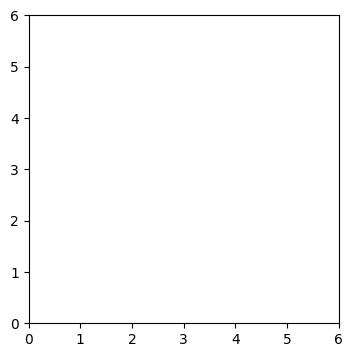

In [3]:
# Sphere tuples are of the form (m, r, x, y, vx, vy)
# Speeds and masses don't matter for this test
L = 6
test_state = [
    (0, 1, 3, 3, 0, 0),
    (0, 1, 2, 0, 0, 0),
    (0, 1, 4.9, 2, 0, 0),
    (0, 1, 4, 4, 0, 0),    
    (0, 1, 1.5, 5.5, 0, 0),
]

plt.figure(figsize=(4,4), dpi=100)
plt.xlim(0,L)
plt.ylim(0,L)
plot_state(test_state)

In [ ]:
# Spheres 0 and 3 should overlap, and no others
print(find_overlaps_in_state(test_state))

# Sphere 1 should overlap with the 'S' wall; sphere 4 should overlap with the 'N' wall; no other overlaps
print(find_wall_collisions_in_state(test_state, L))

## 2. `compute_time_to_wall_collision`

Using a simple test state, find the time until a single sphere collides with a wall.

In [ ]:
# Sphere tuples are of the form (m, r, x, y, vx, vy)
test_state_2 = [
    (0, 1, 3, 3, 1, 0),
    (0, 1, 1, 2, 1, 1),
]

# Collision with right wall at L=6 should happen after 2 seconds
compute_time_to_wall_collision(test_state_2, 0, L, 'E')

## 3. `get_state_at_time`

Using two known simple test states, return the state interpolating between them.

In [ ]:
# This is test_state_2 after 1.5 seconds of time elapsed
test_state_3 = [
    (0, 1, 3, 3, 1, 0),
    (0, 1, 1, 2, 0, 1),
]

In [ ]:
# Get the state halfway between
get_state_at_time(0.75, (0, 1.5), (test_state_2, test_state_3))

# Particle 0 should be at (3.75, 3.0)
# Particle 1 should be at (1.75, 2.75)

## 4. `random_initial_state`

Make sure that no overlaps with walls or between particles exist in a random initial state.

In [ ]:
rstate = random_initial_state(5, 1, 1., 0.1, 1.)

In [ ]:
# Plot should show no overlaps

plt.figure(figsize=(4,4), dpi=100)
plt.xlim(0,1)
plt.ylim(0,1)
plot_state(rstate)

In [ ]:
# Should be empty list []
print(find_overlaps_in_state(rstate))

# Should be empty list []
print(find_wall_collisions_in_state(rstate, L))

## 5. Main loop

(copy me in from kinetic_scratch.)

In [ ]:
N_particles = 100
L = 5
v_max = 1.
r = 0.1
m = 1.

state0 = random_initial_state(N_particles, L, v_max, r, m)

In [ ]:
plt.figure(figsize=(4,4), dpi=100)
plt.xlim(0,L)
plt.ylim(0,L)
plot_state(state0)

In [ ]:
(times, states) = simulate_gas(state0, 5, L)

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

plt.figure(figsize=(4,6), dpi=100)
plt.xlim(0,L)
plt.ylim(0,L)

fig, ax = plt.subplots()

ax.set_xlim(0,L)
ax.set_ylim(0,L)

frames = []
for t in np.linspace(0,5,5*10):
    frames.append(plot_state_frame(ax, get_state_at_time(t, times, states)))
    
ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True)

plt.close(fig)  ## Stops Jupyter from showing the last frame alongside the animated plot
HTML(ani.to_jshtml())

In [ ]:
run_API_tests()